In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [69]:
# 데이터 불러오기
respec_final = pd.read_csv('/Users/sungahwang/Desktop/BigContest_data/respec_final_XGB.csv')
respec_final

,Unnamed: 0,application_id,user_id,gender,insert_time,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career,credit_grade
0,1,954900,553686,1.0,2022-06-07 14:29:03,30000000.0,개인사업자,정규직,기타가족소유,30000000.0,대환대출,0.0,1.0,1.0,27000000.0,50.0,16.0,3.0
1,2,137274,59516,1.0,2022-06-07 21:40:22,30000000.0,프리랜서,기타,기타가족소유,10000000.0,생활비,1.0,1.0,5.0,15000000.0,20.0,2.0,5.0
2,3,1570936,167320,1.0,2022-06-07 09:40:27,62000000.0,직장가입자(4대보험O),정규직,자가,2000000.0,생활비,1.0,1.0,7.0,344000000.0,30.0,6.0,4.0
3,4,967833,33400,1.0,2022-06-07 08:55:07,36000000.0,직장가입자(4대보험O),정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0,20.0,2.0,6.0
4,6,1614045,860410,1.0,2022-06-07 11:29:05,45000000.0,기타소득,기타,자가,15000000.0,대환대출,1.0,0.0,1.0,20000000.0,40.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968748,1394211,1864587,489900,1.0,2022-03-22 14:55:32,25000000.0,프리랜서,기타,기타가족소유,5000000.0,사업자금,0.0,0.0,0.0,0.0,20.0,2.0,7.0
968749,1394212,1327066,151422,1.0,2022-03-22 01:19:24,20000000.0,기타소득,기타,자가,50000000.0,생활비,0.0,1.0,1.0,43500000.0,60.0,6.0,1.0
968750,1394213,1319606,173524,1.0,2022-03-22 07:34:32,75000000.0,직장가입자(4대보험O),정규직,자가,100000000.0,대환대출,1.0,1.0,8.0,200000000.0,40.0,14.0,5.0
968751,1394214,1482466,766546,1.0,2022-03-22 22:12:35,50000000.0,직장가입자(4대보험O),정규직,자가,10000000.0,대환대출,0.0,1.0,10.0,117000000.0,40.0,6.0,6.0


In [70]:
respec_final = respec_final.drop(['Unnamed: 0'], axis = 1)

In [71]:
data = respec_final.drop(columns=['application_id','user_id','insert_time'])

In [15]:
from sklearn.preprocessing import PowerTransformer

In [72]:
for c in data.select_dtypes(exclude='object').columns:
    pt = PowerTransformer()
    data[c] =  pt.fit_transform(np.array(data[c]).reshape(-1, 1))

In [17]:
from kmodes.kprototypes import KPrototypes

In [11]:
cost = []
for cluster in range(1,7):
    print('{cluster}\.cluster start'.format(cluster=cluster))
    kproto = KPrototypes(n_clusters = cluster, init='Huang',n_init=2,verbose= 1)
    kproto.fit(data, categorical= [0,2,3,4,6,7,8])
    cost.append(kproto.cost_)

1\.cluster start
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 8094969.999999545
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 8094969.999999545
Best run was number 1
2\.cluster start
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 210581, ncost: 7268666.538281686
Run: 1, iteration: 2/100, moves: 153934, ncost: 7091444.4966895655
Run: 1, iteration: 3/100, moves: 71698, ncost: 7059260.246666497
Run: 1, iteration: 4/100, moves: 29385, ncost: 7053108.73542952
Run: 1, iteration: 5/100, moves: 22465, ncost: 7046566.43120176
Run: 1, iteration: 6/100, moves: 30726, ncost: 7033439.748646006
Run: 1, iteration: 7/100, moves: 54239, ncost: 6995634.882611494
Run: 1, iteration: 8/100, moves: 56163, ncost: 6960569.160463431
Run: 1, iteration: 9/100, moves: 56553, ncost: 6924075.034801

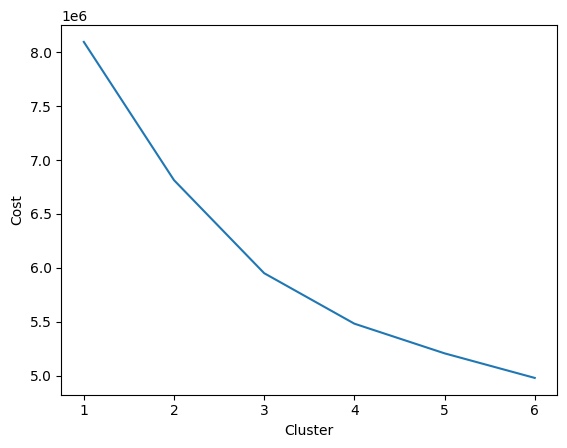

In [12]:
plt.plot(range(1,7),cost)
plt.xlabel('Cluster')
plt.ylabel('Cost')
plt.show()

In [8]:
cost = []
for cluster in range(7,11):
    print('{cluster}\.cluster start'.format(cluster=cluster))
    kproto = KPrototypes(n_clusters = cluster, init='Huang',n_init=2,verbose= 1)
    kproto.fit(data, categorical= [0,2,3,4,6,7,8])
    cost.append(kproto.cost_)

7\.cluster start
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 440508, ncost: 5021711.09932742
Run: 1, iteration: 2/100, moves: 209078, ncost: 4857710.94883927
Run: 1, iteration: 3/100, moves: 92887, ncost: 4824224.564619149
Run: 1, iteration: 4/100, moves: 41614, ncost: 4817360.139579387
Run: 1, iteration: 5/100, moves: 21031, ncost: 4815516.3410098385
Run: 1, iteration: 6/100, moves: 12566, ncost: 4814827.022984673
Run: 1, iteration: 7/100, moves: 7946, ncost: 4814537.861404403
Run: 1, iteration: 8/100, moves: 5472, ncost: 4814388.514696338
Run: 1, iteration: 9/100, moves: 4238, ncost: 4814294.2820506375
Run: 1, iteration: 10/100, moves: 3594, ncost: 4814225.368951642
Run: 1, iteration: 11/100, moves: 3143, ncost: 4814173.597825513
Run: 1, iteration: 12/100, moves: 2466, ncost: 4814140.037401919
Run: 1, iteration: 13/100, moves: 2224, ncost: 4814113.289154067
Run: 1, iteration: 14/100, moves: 1905, ncost: 4814090.9705

Run: 1, iteration: 18/100, moves: 5785, ncost: 4673712.188133075
Run: 1, iteration: 19/100, moves: 4936, ncost: 4673486.746683351
Run: 1, iteration: 20/100, moves: 4173, ncost: 4673326.292684647
Run: 1, iteration: 21/100, moves: 3572, ncost: 4673217.018065615
Run: 1, iteration: 22/100, moves: 3431, ncost: 4673110.954532007
Run: 1, iteration: 23/100, moves: 3279, ncost: 4673027.268090385
Run: 1, iteration: 24/100, moves: 3156, ncost: 4672960.111768853
Run: 1, iteration: 25/100, moves: 2979, ncost: 4672909.058398448
Run: 1, iteration: 26/100, moves: 2640, ncost: 4672866.970293205
Run: 1, iteration: 27/100, moves: 2402, ncost: 4672832.420722234
Run: 1, iteration: 28/100, moves: 2318, ncost: 4672796.943224698
Run: 1, iteration: 29/100, moves: 7596, ncost: 4670329.522985914
Run: 1, iteration: 30/100, moves: 7532, ncost: 4669824.569821983
Run: 1, iteration: 31/100, moves: 5820, ncost: 4669456.157445625
Run: 1, iteration: 32/100, moves: 5192, ncost: 4669204.213830522
Run: 1, iteration: 33/100

Run: 2, iteration: 44/100, moves: 172, ncost: 4616212.426846199
Run: 2, iteration: 45/100, moves: 167, ncost: 4616212.120830112
Run: 2, iteration: 46/100, moves: 209, ncost: 4616211.865552055
Run: 2, iteration: 47/100, moves: 133, ncost: 4616211.733851744
Run: 2, iteration: 48/100, moves: 96, ncost: 4616211.663194109
Run: 2, iteration: 49/100, moves: 68, ncost: 4616211.634585876
Run: 2, iteration: 50/100, moves: 36, ncost: 4616211.621916689
Run: 2, iteration: 51/100, moves: 34, ncost: 4616211.6096046325
Run: 2, iteration: 52/100, moves: 27, ncost: 4616211.602140908
Run: 2, iteration: 53/100, moves: 10, ncost: 4616211.600276494
Run: 2, iteration: 54/100, moves: 3, ncost: 4616211.600059001
Run: 2, iteration: 55/100, moves: 0, ncost: 4616211.600059001
Best run was number 2
9\.cluster start
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 336877, ncost: 4686962.292299182
Run: 1, iteration: 2/100, moves: 124356, ncost: 4621542.

Run: 2, iteration: 51/100, moves: 262, ncost: 4514856.31016808
Run: 2, iteration: 52/100, moves: 199, ncost: 4514856.038774667
Run: 2, iteration: 53/100, moves: 187, ncost: 4514855.762315209
Run: 2, iteration: 54/100, moves: 160, ncost: 4514855.430475111
Run: 2, iteration: 55/100, moves: 155, ncost: 4514855.146322525
Run: 2, iteration: 56/100, moves: 66, ncost: 4514855.095397655
Run: 2, iteration: 57/100, moves: 32, ncost: 4514855.079091688
Run: 2, iteration: 58/100, moves: 36, ncost: 4514855.066857278
Run: 2, iteration: 59/100, moves: 21, ncost: 4514855.060400615
Run: 2, iteration: 60/100, moves: 35, ncost: 4514855.045683554
Run: 2, iteration: 61/100, moves: 52, ncost: 4514855.0116614215
Run: 2, iteration: 62/100, moves: 92, ncost: 4514854.852676152
Run: 2, iteration: 63/100, moves: 119, ncost: 4514854.749464084
Run: 2, iteration: 64/100, moves: 70, ncost: 4514854.723684727
Run: 2, iteration: 65/100, moves: 34, ncost: 4514854.713523834
Run: 2, iteration: 66/100, moves: 26, ncost: 4514

Run: 2, iteration: 6/100, moves: 37628, ncost: 4465189.650291602
Run: 2, iteration: 7/100, moves: 32580, ncost: 4459823.851109726
Run: 2, iteration: 8/100, moves: 29008, ncost: 4455478.773279386
Run: 2, iteration: 9/100, moves: 25715, ncost: 4452265.338582578
Run: 2, iteration: 10/100, moves: 21825, ncost: 4450086.080021772
Run: 2, iteration: 11/100, moves: 18610, ncost: 4448522.343992324
Run: 2, iteration: 12/100, moves: 16733, ncost: 4447230.42081633
Run: 2, iteration: 13/100, moves: 15565, ncost: 4446148.639776188
Run: 2, iteration: 14/100, moves: 14208, ncost: 4445260.231152067
Run: 2, iteration: 15/100, moves: 12722, ncost: 4444569.905752973
Run: 2, iteration: 16/100, moves: 16325, ncost: 4436918.748294754
Run: 2, iteration: 17/100, moves: 28292, ncost: 4435035.753350893
Run: 2, iteration: 18/100, moves: 11378, ncost: 4434371.688329449
Run: 2, iteration: 19/100, moves: 7748, ncost: 4434049.114719079
Run: 2, iteration: 20/100, moves: 5731, ncost: 4433878.943833276
Run: 2, iteration

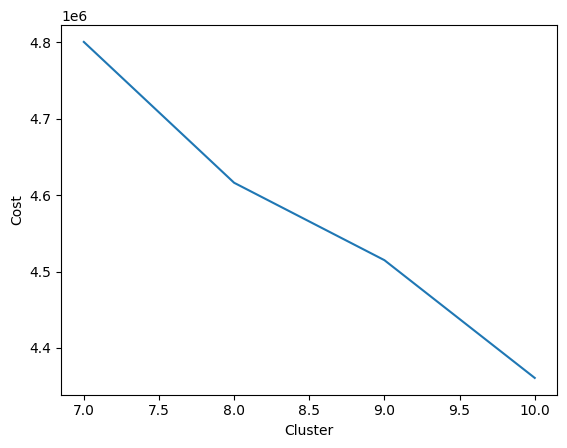

In [9]:
plt.plot(range(7,11),cost)
plt.xlabel('Cluster')
plt.ylabel('Cost')
plt.show()

In [18]:
cost = []
for cluster in range(11,15):
    print('{cluster}\.cluster start'.format(cluster=cluster))
    kproto = KPrototypes(n_clusters = cluster, init='Huang',n_init=2,verbose= 1)
    kproto.fit(data, categorical= [0,2,3,4,6,7,8])
    cost.append(kproto.cost_)

11\.cluster start
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 420569, ncost: 4541348.108418101
Run: 1, iteration: 2/100, moves: 164568, ncost: 4424577.999315789
Run: 1, iteration: 3/100, moves: 91925, ncost: 4362963.9608602645
Run: 1, iteration: 4/100, moves: 70659, ncost: 4326532.388748513
Run: 1, iteration: 5/100, moves: 63519, ncost: 4303381.777874329
Run: 1, iteration: 6/100, moves: 60435, ncost: 4280899.823272079
Run: 1, iteration: 7/100, moves: 50587, ncost: 4266465.251280613
Run: 1, iteration: 8/100, moves: 35519, ncost: 4260709.303722018
Run: 1, iteration: 9/100, moves: 24981, ncost: 4258100.894220122
Run: 1, iteration: 10/100, moves: 20121, ncost: 4256188.405957431
Run: 1, iteration: 11/100, moves: 17569, ncost: 4254651.527587682
Run: 1, iteration: 12/100, moves: 16811, ncost: 4253180.109671145
Run: 1, iteration: 13/100, moves: 17535, ncost: 4251425.032466634
Run: 1, iteration: 14/100, moves: 18016, ncost: 42

Run: 1, iteration: 16/100, moves: 6286, ncost: 4167530.1321065463
Run: 1, iteration: 17/100, moves: 5302, ncost: 4167148.060743932
Run: 1, iteration: 18/100, moves: 4727, ncost: 4166900.388964722
Run: 1, iteration: 19/100, moves: 4360, ncost: 4166740.7491000174
Run: 1, iteration: 20/100, moves: 3930, ncost: 4166632.756639082
Run: 1, iteration: 21/100, moves: 3395, ncost: 4166561.4036758454
Run: 1, iteration: 22/100, moves: 3449, ncost: 4166490.8298188634
Run: 1, iteration: 23/100, moves: 3739, ncost: 4166402.83682222
Run: 1, iteration: 24/100, moves: 3999, ncost: 4166297.7017102987
Run: 1, iteration: 25/100, moves: 4202, ncost: 4166180.3899514303
Run: 1, iteration: 26/100, moves: 4335, ncost: 4166051.870221095
Run: 1, iteration: 27/100, moves: 4485, ncost: 4165909.3397699376
Run: 1, iteration: 28/100, moves: 5123, ncost: 4165706.697114637
Run: 1, iteration: 29/100, moves: 5876, ncost: 4165431.701149366
Run: 1, iteration: 30/100, moves: 7488, ncost: 4164984.335995608
Run: 1, iteration: 

Run: 2, iteration: 41/100, moves: 367, ncost: 4167652.8300739024
Run: 2, iteration: 42/100, moves: 282, ncost: 4167652.3643082497
Run: 2, iteration: 43/100, moves: 251, ncost: 4167651.87728279
Run: 2, iteration: 44/100, moves: 244, ncost: 4167651.5368806184
Run: 2, iteration: 45/100, moves: 151, ncost: 4167651.378980099
Run: 2, iteration: 46/100, moves: 138, ncost: 4167651.23649558
Run: 2, iteration: 47/100, moves: 236, ncost: 4167650.6698003183
Run: 2, iteration: 48/100, moves: 307, ncost: 4167650.0679187644
Run: 2, iteration: 49/100, moves: 251, ncost: 4167649.6372712506
Run: 2, iteration: 50/100, moves: 292, ncost: 4167649.1433308516
Run: 2, iteration: 51/100, moves: 265, ncost: 4167648.7026224034
Run: 2, iteration: 52/100, moves: 278, ncost: 4167648.3009013906
Run: 2, iteration: 53/100, moves: 203, ncost: 4167648.0653419965
Run: 2, iteration: 54/100, moves: 235, ncost: 4167647.6995509085
Run: 2, iteration: 55/100, moves: 200, ncost: 4167647.34010067
Run: 2, iteration: 56/100, moves

Run: 2, iteration: 11/100, moves: 20680, ncost: 4123675.9531316534
Run: 2, iteration: 12/100, moves: 16713, ncost: 4122475.732072965
Run: 2, iteration: 13/100, moves: 25461, ncost: 4114779.490107365
Run: 2, iteration: 14/100, moves: 28524, ncost: 4111038.060706647
Run: 2, iteration: 15/100, moves: 21527, ncost: 4107199.6064720047
Run: 2, iteration: 16/100, moves: 22645, ncost: 4098963.560338143
Run: 2, iteration: 17/100, moves: 24453, ncost: 4087427.7651744713
Run: 2, iteration: 18/100, moves: 23957, ncost: 4080254.219255598
Run: 2, iteration: 19/100, moves: 25434, ncost: 4075544.791553872
Run: 2, iteration: 20/100, moves: 29077, ncost: 4069499.073538471
Run: 2, iteration: 21/100, moves: 32097, ncost: 4057717.840794353
Run: 2, iteration: 22/100, moves: 36241, ncost: 4052495.592524253
Run: 2, iteration: 23/100, moves: 21775, ncost: 4050567.6346002235
Run: 2, iteration: 24/100, moves: 14218, ncost: 4049853.189205496
Run: 2, iteration: 25/100, moves: 9463, ncost: 4049552.836111886
Run: 2,

Run: 2, iteration: 5/100, moves: 81172, ncost: 4063353.1873170272
Run: 2, iteration: 6/100, moves: 61177, ncost: 4044094.4203903764
Run: 2, iteration: 7/100, moves: 55879, ncost: 4030049.752840057
Run: 2, iteration: 8/100, moves: 34781, ncost: 4024019.3714090134
Run: 2, iteration: 9/100, moves: 22603, ncost: 4021666.026067751
Run: 2, iteration: 10/100, moves: 15969, ncost: 4020501.3782478496
Run: 2, iteration: 11/100, moves: 11880, ncost: 4019849.386115704
Run: 2, iteration: 12/100, moves: 9385, ncost: 4019451.1081618015
Run: 2, iteration: 13/100, moves: 7200, ncost: 4019213.8987964746
Run: 2, iteration: 14/100, moves: 5747, ncost: 4019066.884585732
Run: 2, iteration: 15/100, moves: 4518, ncost: 4018967.7222598298
Run: 2, iteration: 16/100, moves: 3722, ncost: 4018900.749800985
Run: 2, iteration: 17/100, moves: 3065, ncost: 4018855.8532578284
Run: 2, iteration: 18/100, moves: 2411, ncost: 4018828.6384886247
Run: 2, iteration: 19/100, moves: 2068, ncost: 4018807.985792416
Run: 2, iterat

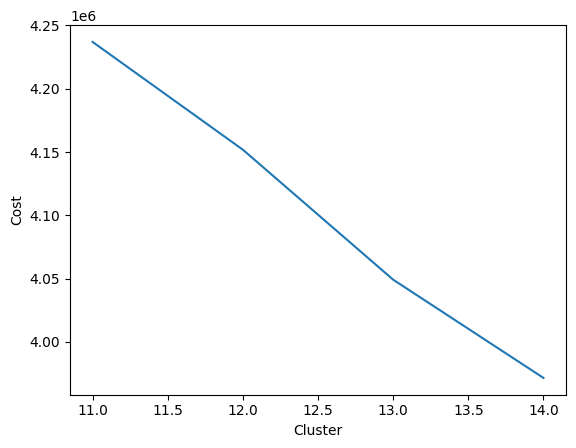

In [19]:
plt.plot(range(11,15),cost)
plt.xlabel('Cluster')
plt.ylabel('Cost')
plt.show()

1: 8094969.999999545
2: 6813280.911872336
3: 5950544.058673383
4: 5482539.276042957
5: 5207453.787981985
6: 4979534.481390357
7: 4800620.74740249
8: 4616211.600059001
9: 4514854.703671859
10: 4360689.215068265
11: 4236891.057412964
12: 4167653.6371880164
13: 4049156.703990532
14: 3971591.045171491

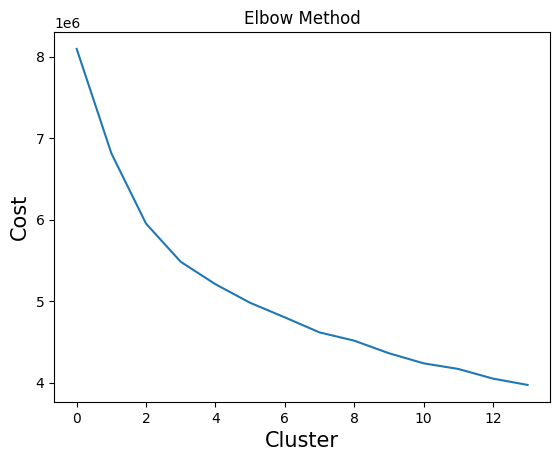

In [94]:
plt.plot([8094969.999999545, 6813280.911872336, 5950544.058673383, 5482539.276042957, 5207453.787981985, 4979534.481390357, 4800620.74740249, 4616211.600059001,4514854.703671859,4360689.215068265,4236891.057412964,4167653.6371880164,4049156.703990532,3971591.045171491])
plt.title("Elbow Method")
plt.xlabel('Cluster', size = 15)
plt.ylabel('Cost', size = 15)
plt.show()

-> 6으로 결정

In [22]:
kproto = KPrototypes(n_clusters = 6, init='Huang',n_jobs=-1,n_init=1,verbose=True)
kproto.fit(data, categorical=[0,2,3,4,6,7,8])
centroids = kproto.cluster_centroids_
labels  = kproto.labels_

In [23]:
centroids

array([['-0.21663575759768708', '-0.4696262862945004',
        '0.2329738841405278', '0.11971550069792267',
        '-0.8287021181495522', '-0.7656909815558517',
        '0.6956171921515807', '0.6999554736168097', '직장가입자(4대보험O)',
        '정규직', '전월세', '생활비', '-0.8381650728864258',
        '-1.2359982497765296'],
       ['0.09703916083255217', '0.17220833487046197',
        '-1.593947317955422', '-1.9803788351093188',
        '-0.13621179340586034', '-0.01389401176287306',
        '-0.4596612753289858', '0.6999554736168097', '직장가입자(4대보험O)',
        '정규직', '전월세', '생활비', '-0.8381650728864258',
        '-1.2359982497765296'],
       ['-2.5969228099679365', '-0.8230753486442831',
        '-0.4444084706919936', '-0.5401320009560627',
        '-0.6581389791631406', '-0.3188256828469936',
        '-0.2875175547829109', '0.6999554736168097', '기타소득', '기타', '전월세',
        '생활비', '-0.8381650728864258', '0.8090626343369025'],
       ['1.0824035887904087', '0.7717590923125032', '0.5483946240422602',

In [24]:
labels

array([3, 0, 3, ..., 3, 5, 1], dtype=uint16)

In [25]:
data['Labels'] = labels

In [26]:
cluster1 = data[data['Labels']==0]
cluster2 = data[data['Labels']==1]
cluster3 = data[data['Labels']==2]
cluster4 = data[data['Labels']==3]
cluster5 = data[data['Labels']==4]
cluster6 = data[data['Labels']==5]

5 239265
0 223346
4 197021
1 141937
3 127606
2 39578


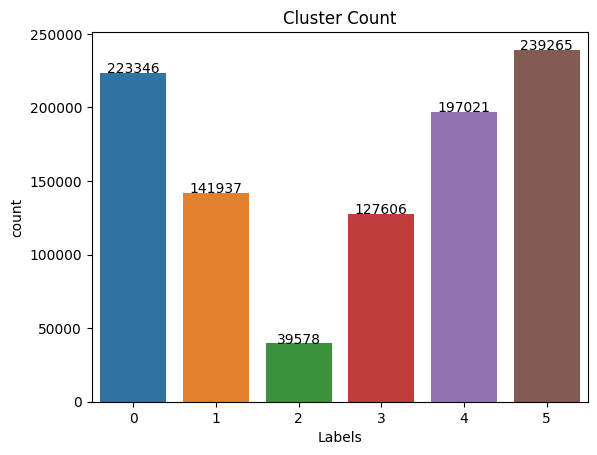

In [27]:
ax=sns.countplot(x=data.Labels)
for index, row in pd.DataFrame(data['Labels'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])),color='black', ha="center")
    print(index,row.values[0])
plt.title('Cluster Count')
plt.show()

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_new = data.drop(columns=['income_type','employment_type','houseown_type','purpose'])
pca_transformed = pca.fit_transform(data_new)
pca_transformed

array([[-1.06999658,  2.05436274],
       [ 2.65531089, -0.13983579],
       [-1.10507231, -0.61836042],
       ...,
       [-1.71933648,  0.59603924],
       [-2.94828307, -0.7471857 ],
       [ 1.98684592,  1.77955143]])

In [29]:
data['pca_x'] = pca_transformed[:,0]
data['pca_y'] = pca_transformed[:,1]
data.head(3)

,gender,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career,credit_grade,Labels,pca_x,pca_y
0,0.699955,-0.218550,개인사업자,정규직,기타가족소유,0.491106,대환대출,-0.838165,0.809063,-0.790838,0.053903,1.241716,1.717426,-1.612134,3,-1.069997,2.054363
1,0.699955,-0.218550,프리랜서,기타,기타가족소유,-0.401264,생활비,1.193082,0.809063,0.631577,-0.207583,-1.549285,-0.615375,-0.624767,0,2.655311,-0.139836
2,0.699955,0.768897,직장가입자(4대보험O),정규직,자가,-1.498532,생활비,1.193082,0.809063,1.025704,1.691686,-0.441694,0.799774,-1.185804,3,-1.105072,-0.618360


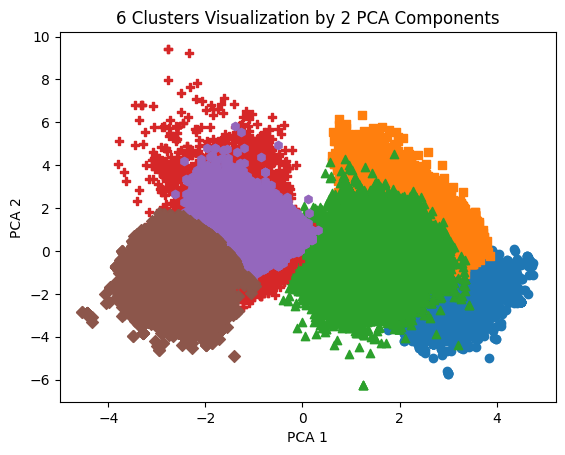

In [30]:
marker0_ind = data[data['Labels']==0].index
marker1_ind = data[data['Labels']==1].index
marker2_ind = data[data['Labels']==2].index
marker3_ind = data[data['Labels']==3].index
marker4_ind = data[data['Labels']==4].index
marker5_ind = data[data['Labels']==5].index

plt.scatter(x=data.loc[marker0_ind,'pca_x'], y=data.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=data.loc[marker1_ind,'pca_x'], y=data.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=data.loc[marker2_ind,'pca_x'], y=data.loc[marker2_ind,'pca_y'], marker='^')
plt.scatter(x=data.loc[marker3_ind,'pca_x'], y=data.loc[marker3_ind,'pca_y'], marker='P') 
plt.scatter(x=data.loc[marker4_ind,'pca_x'], y=data.loc[marker4_ind,'pca_y'], marker='h')
plt.scatter(x=data.loc[marker5_ind,'pca_x'], y=data.loc[marker5_ind,'pca_y'], marker='D')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('6 Clusters Visualization by 2 PCA Components')
plt.savefig('test.png') 
plt.show()

... 좀 이상함

In [37]:
kproto2 = KPrototypes(n_clusters = 7, init='Huang',n_jobs=-1,n_init=1,verbose=True)
kproto2.fit(data, categorical=[0,2,3,4,6,7,8])
centroids2 = kproto2.cluster_centroids_
labels2  = kproto2.labels_

In [46]:
centroids2

array([['0.1735209143042626', '-0.2856369874381666',
        '0.7967459652272544', '0.5818118678513976', '0.4865252427597309',
        '0.9916704589531355', '0.5545249480093752', '0.6999554736168097',
        '직장가입자(4대보험O)', '정규직', '전월세', '생활비', '-0.8381650728864258',
        '0.8090626343369025'],
       ['-0.07460685299861182', '-0.07775818047208304',
        '0.34466405912600995', '0.32409465923523606',
        '0.9209610280845134', '-0.6472835964749397',
        '0.4819224106385108', '0.6999554736168097', '직장가입자(4대보험O)',
        '정규직', '전월세', '생활비', '-0.8381650728864258', '0.8090626343369025'],
       ['-0.018240997556469938', '0.40958193699623274',
        '-0.22765003380002122', '0.22606732118398776',
        '-0.3168076500047365', '-0.29906125313164783',
        '-0.9191797372064197', '0.6999554736168097', '직장가입자(4대보험O)',
        '정규직', '전월세', '생활비', '-0.8381650728864258', '0.8090626343369025'],
       ['-2.6809433705958354', '-0.8029834135714801',
        '-0.43703640004995936'

In [49]:
data['Labels2'] = labels2

In [50]:
cluster1 = data[data['Labels2']==0]
cluster2 = data[data['Labels2']==1]
cluster3 = data[data['Labels2']==2]
cluster4 = data[data['Labels2']==3]
cluster5 = data[data['Labels2']==4]
cluster6 = data[data['Labels2']==5]
cluster7 = data[data['Labels2']==6]

6 195211
0 183556
2 160385
1 145754
5 141434
4 104785
3 37628


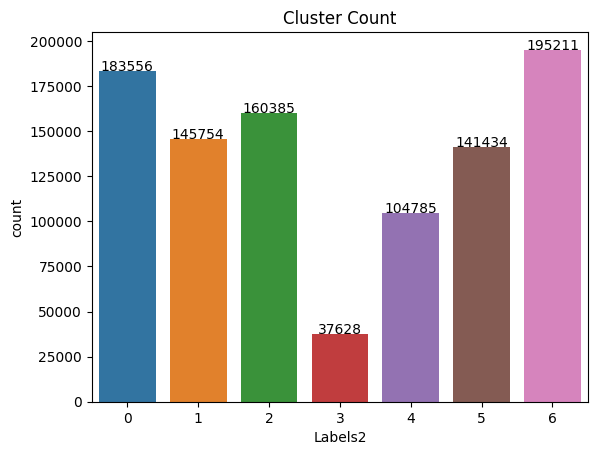

In [52]:
ax=sns.countplot(x=data.Labels2)
for index, row in pd.DataFrame(data['Labels2'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])),color='black', ha="center")
    print(index,row.values[0])
plt.title('Cluster Count')
plt.show()

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_new = data.drop(columns=['income_type','employment_type','houseown_type','purpose'])
pca_transformed = pca.fit_transform(data_new)
pca_transformed

array([[-0.57552647,  3.20097622],
       [ 4.82978587, -0.22617102],
       [-2.9375877 , -1.00557385],
       ...,
       [-1.34459375,  1.35995021],
       [-5.13087684, -0.88765625],
       [ 3.51839308,  2.36038172]])

In [54]:
data['pca_x'] = pca_transformed[:,0]
data['pca_y'] = pca_transformed[:,1]
data.head(3)

,gender,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career,credit_grade,Labels,pca_x,pca_y,Labels2
0,0.699955,-0.218550,개인사업자,정규직,기타가족소유,0.491106,대환대출,-0.838165,0.809063,-0.790838,0.053903,1.241716,1.717426,-1.612134,3,-0.575526,3.200976,4
1,0.699955,-0.218550,프리랜서,기타,기타가족소유,-0.401264,생활비,1.193082,0.809063,0.631577,-0.207583,-1.549285,-0.615375,-0.624767,0,4.829786,-0.226171,6
2,0.699955,0.768897,직장가입자(4대보험O),정규직,자가,-1.498532,생활비,1.193082,0.809063,1.025704,1.691686,-0.441694,0.799774,-1.185804,3,-2.937588,-1.005574,0


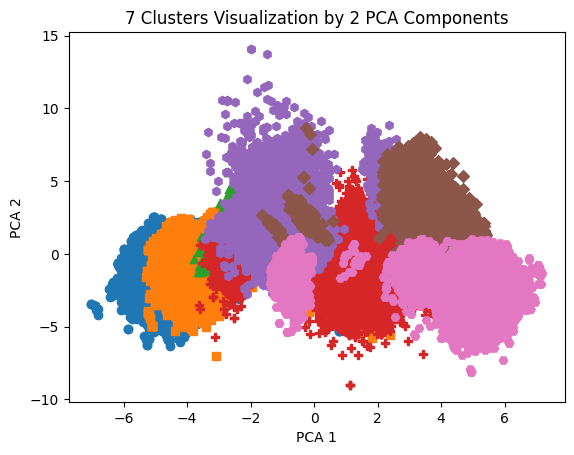

In [55]:
marker0_ind = data[data['Labels2']==0].index
marker1_ind = data[data['Labels2']==1].index
marker2_ind = data[data['Labels2']==2].index
marker3_ind = data[data['Labels2']==3].index
marker4_ind = data[data['Labels2']==4].index
marker5_ind = data[data['Labels2']==5].index
marker6_ind = data[data['Labels2']==6].index

plt.scatter(x=data.loc[marker0_ind,'pca_x'], y=data.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=data.loc[marker1_ind,'pca_x'], y=data.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=data.loc[marker2_ind,'pca_x'], y=data.loc[marker2_ind,'pca_y'], marker='^')
plt.scatter(x=data.loc[marker3_ind,'pca_x'], y=data.loc[marker3_ind,'pca_y'], marker='P') 
plt.scatter(x=data.loc[marker4_ind,'pca_x'], y=data.loc[marker4_ind,'pca_y'], marker='h')
plt.scatter(x=data.loc[marker5_ind,'pca_x'], y=data.loc[marker5_ind,'pca_y'], marker='D')
plt.scatter(x=data.loc[marker6_ind,'pca_x'], y=data.loc[marker6_ind,'pca_y'], marker='H')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('7 Clusters Visualization by 2 PCA Components')
plt.savefig('test.png') 
plt.show()

걍 5로

In [73]:
data.head(3)

,gender,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career,credit_grade
0,0.699955,-0.218550,개인사업자,정규직,기타가족소유,0.491106,대환대출,-0.838165,0.809063,-0.790838,0.053903,1.241716,1.717426,-1.612134
1,0.699955,-0.218550,프리랜서,기타,기타가족소유,-0.401264,생활비,1.193082,0.809063,0.631577,-0.207583,-1.549285,-0.615375,-0.624767
2,0.699955,0.768897,직장가입자(4대보험O),정규직,자가,-1.498532,생활비,1.193082,0.809063,1.025704,1.691686,-0.441694,0.799774,-1.185804


In [74]:
kproto = KPrototypes(n_clusters = 5, init='Huang',n_jobs=-1,n_init=1,verbose=True)
kproto.fit(data, categorical=[0,2,3,4,6,7,8])
centroids = kproto.cluster_centroids_
labels  = kproto.labels_

In [75]:
centroids

array([['-0.0562303871377084', '0.12763668632841577',
        '-1.592807543046223', '-1.9780915264689694',
        '-0.16476075141843516', '-0.028685873084689367',
        '-0.46402722775746563', '0.6999554736168097', '직장가입자(4대보험O)',
        '정규직', '전월세', '생활비', '-0.8381650728864258',
        '-1.2359982497765296'],
       ['0.055333895830087694', '0.5848162622093067',
        '-0.18225337242233688', '0.30460209153495615',
        '0.17852458132175253', '-0.09662098637211823',
        '-0.9141667689983157', '0.6999554736168097', '직장가입자(4대보험O)',
        '정규직', '전월세', '생활비', '-0.8381650728864258', '0.8090626343369025'],
       ['-0.5156390212377058', '-0.5418934359401487',
        '0.05967182123774527', '0.014313988707198222',
        '-1.0442783865957332', '-0.799060440911545',
        '0.3504831797286248', '0.6999554736168097', '직장가입자(4대보험O)',
        '정규직', '전월세', '생활비', '-0.8381650728864258', '0.8090626343369025'],
       ['0.9481599030544291', '0.46138763488751533',
        '0.72782

In [76]:
labels

array([1, 2, 3, ..., 3, 3, 0], dtype=uint16)

In [77]:
data['Labels'] = labels

In [78]:
cluster1 = data[data['Labels']==0]
cluster2 = data[data['Labels']==1]
cluster3 = data[data['Labels']==2]
cluster4 = data[data['Labels']==3]
cluster5 = data[data['Labels']==4]

4 250380
2 210714
1 207102
3 150786
0 149771


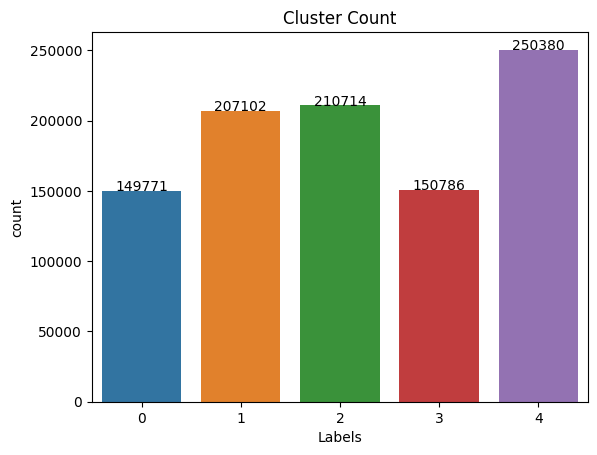

In [79]:
ax=sns.countplot(x=data.Labels)
for index, row in pd.DataFrame(data['Labels'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])),color='black', ha="center")
    print(index,row.values[0])
plt.title('Cluster Count')
plt.show()

In [80]:
pca = PCA(n_components=2)
data_new = data.drop(columns=['income_type','employment_type','houseown_type','purpose'])
pca_transformed = pca.fit_transform(data_new)
pca_transformed

array([[ 1.258823  ,  2.35569676],
       [ 0.40074956, -0.35969643],
       [-1.62481873,  1.01984128],
       ...,
       [-1.64212203,  2.81411075],
       [-1.86469432,  1.03186978],
       [ 2.97581179,  0.07389811]])

In [81]:
data['pca_x'] = pca_transformed[:,0]
data['pca_y'] = pca_transformed[:,1]
data.head(3)

,gender,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career,credit_grade,Labels,pca_x,pca_y
0,0.699955,-0.218550,개인사업자,정규직,기타가족소유,0.491106,대환대출,-0.838165,0.809063,-0.790838,0.053903,1.241716,1.717426,-1.612134,1,1.258823,2.355697
1,0.699955,-0.218550,프리랜서,기타,기타가족소유,-0.401264,생활비,1.193082,0.809063,0.631577,-0.207583,-1.549285,-0.615375,-0.624767,2,0.400750,-0.359696
2,0.699955,0.768897,직장가입자(4대보험O),정규직,자가,-1.498532,생활비,1.193082,0.809063,1.025704,1.691686,-0.441694,0.799774,-1.185804,3,-1.624819,1.019841


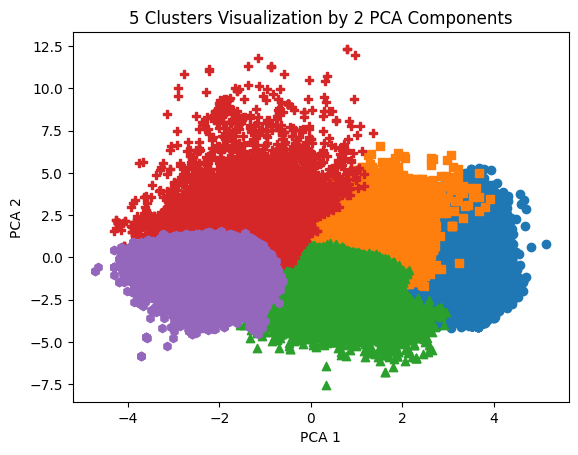

In [82]:
marker0_ind = data[data['Labels']==0].index
marker1_ind = data[data['Labels']==1].index
marker2_ind = data[data['Labels']==2].index
marker3_ind = data[data['Labels']==3].index
marker4_ind = data[data['Labels']==4].index

plt.scatter(x=data.loc[marker0_ind,'pca_x'], y=data.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=data.loc[marker1_ind,'pca_x'], y=data.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=data.loc[marker2_ind,'pca_x'], y=data.loc[marker2_ind,'pca_y'], marker='^')
plt.scatter(x=data.loc[marker3_ind,'pca_x'], y=data.loc[marker3_ind,'pca_y'], marker='P') 
plt.scatter(x=data.loc[marker4_ind,'pca_x'], y=data.loc[marker4_ind,'pca_y'], marker='h')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('5 Clusters Visualization by 2 PCA Components')
plt.savefig('test.png') 
plt.show()

결정!

In [84]:
label_final = data['Labels']
label_final

0         1
1         2
2         3
3         2
4         4
         ..
968748    0
968749    1
968750    3
968751    3
968752    0
Name: Labels, Length: 968753, dtype: uint16

In [85]:
respec_final

,application_id,user_id,gender,insert_time,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career,credit_grade
0,954900,553686,1.0,2022-06-07 14:29:03,30000000.0,개인사업자,정규직,기타가족소유,30000000.0,대환대출,0.0,1.0,1.0,27000000.0,50.0,16.0,3.0
1,137274,59516,1.0,2022-06-07 21:40:22,30000000.0,프리랜서,기타,기타가족소유,10000000.0,생활비,1.0,1.0,5.0,15000000.0,20.0,2.0,5.0
2,1570936,167320,1.0,2022-06-07 09:40:27,62000000.0,직장가입자(4대보험O),정규직,자가,2000000.0,생활비,1.0,1.0,7.0,344000000.0,30.0,6.0,4.0
3,967833,33400,1.0,2022-06-07 08:55:07,36000000.0,직장가입자(4대보험O),정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0,20.0,2.0,6.0
4,1614045,860410,1.0,2022-06-07 11:29:05,45000000.0,기타소득,기타,자가,15000000.0,대환대출,1.0,0.0,1.0,20000000.0,40.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968748,1864587,489900,1.0,2022-03-22 14:55:32,25000000.0,프리랜서,기타,기타가족소유,5000000.0,사업자금,0.0,0.0,0.0,0.0,20.0,2.0,7.0
968749,1327066,151422,1.0,2022-03-22 01:19:24,20000000.0,기타소득,기타,자가,50000000.0,생활비,0.0,1.0,1.0,43500000.0,60.0,6.0,1.0
968750,1319606,173524,1.0,2022-03-22 07:34:32,75000000.0,직장가입자(4대보험O),정규직,자가,100000000.0,대환대출,1.0,1.0,8.0,200000000.0,40.0,14.0,5.0
968751,1482466,766546,1.0,2022-03-22 22:12:35,50000000.0,직장가입자(4대보험O),정규직,자가,10000000.0,대환대출,0.0,1.0,10.0,117000000.0,40.0,6.0,6.0


In [86]:
respec_final_clust = pd.concat([respec_final, label_final], axis = 1)
respec_final_clust

,application_id,user_id,gender,insert_time,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career,credit_grade,Labels
0,954900,553686,1.0,2022-06-07 14:29:03,30000000.0,개인사업자,정규직,기타가족소유,30000000.0,대환대출,0.0,1.0,1.0,27000000.0,50.0,16.0,3.0,1
1,137274,59516,1.0,2022-06-07 21:40:22,30000000.0,프리랜서,기타,기타가족소유,10000000.0,생활비,1.0,1.0,5.0,15000000.0,20.0,2.0,5.0,2
2,1570936,167320,1.0,2022-06-07 09:40:27,62000000.0,직장가입자(4대보험O),정규직,자가,2000000.0,생활비,1.0,1.0,7.0,344000000.0,30.0,6.0,4.0,3
3,967833,33400,1.0,2022-06-07 08:55:07,36000000.0,직장가입자(4대보험O),정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0,20.0,2.0,6.0,2
4,1614045,860410,1.0,2022-06-07 11:29:05,45000000.0,기타소득,기타,자가,15000000.0,대환대출,1.0,0.0,1.0,20000000.0,40.0,6.0,7.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968748,1864587,489900,1.0,2022-03-22 14:55:32,25000000.0,프리랜서,기타,기타가족소유,5000000.0,사업자금,0.0,0.0,0.0,0.0,20.0,2.0,7.0,0
968749,1327066,151422,1.0,2022-03-22 01:19:24,20000000.0,기타소득,기타,자가,50000000.0,생활비,0.0,1.0,1.0,43500000.0,60.0,6.0,1.0,1
968750,1319606,173524,1.0,2022-03-22 07:34:32,75000000.0,직장가입자(4대보험O),정규직,자가,100000000.0,대환대출,1.0,1.0,8.0,200000000.0,40.0,14.0,5.0,3
968751,1482466,766546,1.0,2022-03-22 22:12:35,50000000.0,직장가입자(4대보험O),정규직,자가,10000000.0,대환대출,0.0,1.0,10.0,117000000.0,40.0,6.0,6.0,3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 317994, ncost: 5452141.28306167
Run: 1, iteration: 2/100, moves: 143484, ncost: 5346379.580651625
Run: 1, iteration: 3/100, moves: 91240, ncost: 5304716.594212341
Run: 1, iteration: 4/100, moves: 64886, ncost: 5280218.723620953
Run: 1, iteration: 5/100, moves: 51810, ncost: 5263877.400504282
Run: 1, iteration: 6/100, moves: 41524, ncost: 5253740.72093071
Run: 1, iteration: 7/100, moves: 32297, ncost: 5247993.690316432
Run: 1, iteration: 8/100, moves: 23055, ncost: 5245114.618639908
Run: 1, iteration: 9/100, moves: 15455, ncost: 5243833.817476667
Run: 1, iteration: 10/100, moves: 9892, ncost: 5243310.763891669
Run: 1, iteration: 11/100, moves: 6620, ncost: 5243085.377748076
Run: 1, iteration: 12/100, moves: 4688, ncost: 5242966.26924981
Run: 1, iteration: 13/100, moves: 3630, ncost: 5242888.283403943
Run: 1, iteration: 14/100, moves: 2838, ncost: 5242834.805362862
Run: 1, ite

In [88]:
respec_final_clust.to_csv("respec_final_clust.csv", index = False)